<a href="https://colab.research.google.com/github/akifkashif/EDA-Capstone-Project---Mohammed-Akifuddin/blob/main/TEAM_Telecom_Churn_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Orange S.A., formerly France Télécom S.A., is a French multinational telecommunications corporation. The Orange Telecom's Churn Dataset, consists of cleaned customer activity data (features), along with a churn label specifying whether a customer canceled the subscription.

## <b> Explore and analyze the data to discover key factors responsible for customer churn and come up with ways/recommendations to ensure customer retention. </b>

In [2]:
import numpy as np
import pandas as pd
from numpy import math
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
from google.colab import drive
drive.mount('/content/drive')



Mounted at /content/drive


In [4]:
df = pd.read_csv('/content/drive/MyDrive/Telecom Churn.csv')

In [5]:
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [6]:
df.describe()


,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [8]:
numeric_features= list(df.describe().columns)
numeric_features.remove('Area code')

In [9]:
print(numeric_features)

['Account length', 'Number vmail messages', 'Total day minutes', 'Total day calls', 'Total day charge', 'Total eve minutes', 'Total eve calls', 'Total eve charge', 'Total night minutes', 'Total night calls', 'Total night charge', 'Total intl minutes', 'Total intl calls', 'Total intl charge', 'Customer service calls']


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3333 non-null   object 
 1   Account length          3333 non-null   int64  
 2   Area code               3333 non-null   int64  
 3   International plan      3333 non-null   object 
 4   Voice mail plan         3333 non-null   object 
 5   Number vmail messages   3333 non-null   int64  
 6   Total day minutes       3333 non-null   float64
 7   Total day calls         3333 non-null   int64  
 8   Total day charge        3333 non-null   float64
 9   Total eve minutes       3333 non-null   float64
 10  Total eve calls         3333 non-null   int64  
 11  Total eve charge        3333 non-null   float64
 12  Total night minutes     3333 non-null   float64
 13  Total night calls       3333 non-null   int64  
 14  Total night charge      3333 non-null   

In [ ]:
df.nunique()

State                       51
Account length             212
Area code                    3
International plan           2
Voice mail plan              2
Number vmail messages       46
Total day minutes         1667
Total day calls            119
Total day charge          1667
Total eve minutes         1611
Total eve calls            123
Total eve charge          1440
Total night minutes       1591
Total night calls          120
Total night charge         933
Total intl minutes         162
Total intl calls            21
Total intl charge          162
Customer service calls      10
Churn                        2
dtype: int64

In [ ]:
df["Area code"].unique()

array([415, 408, 510])

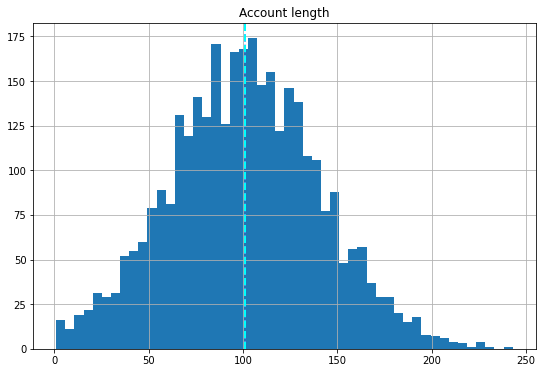

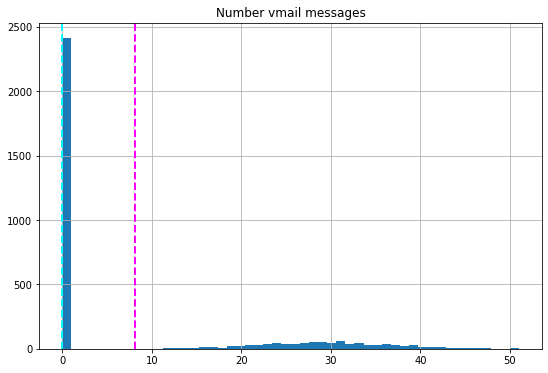

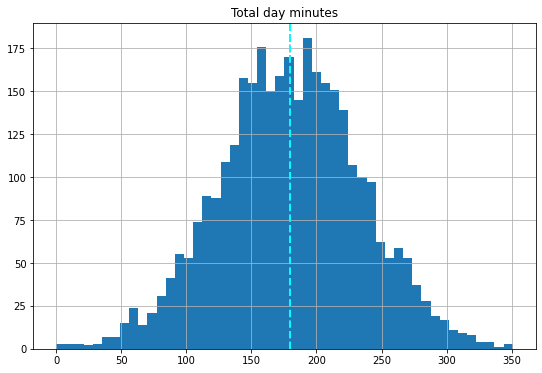

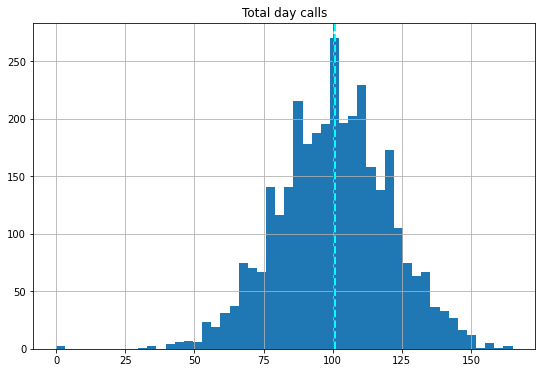

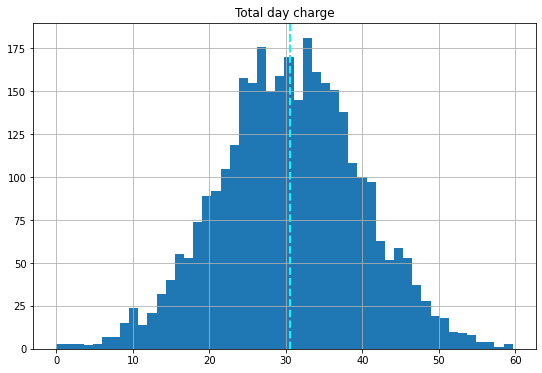

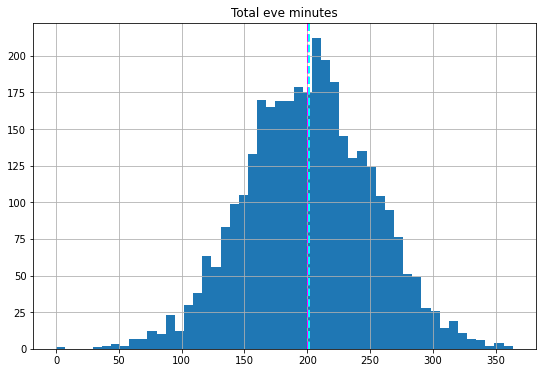

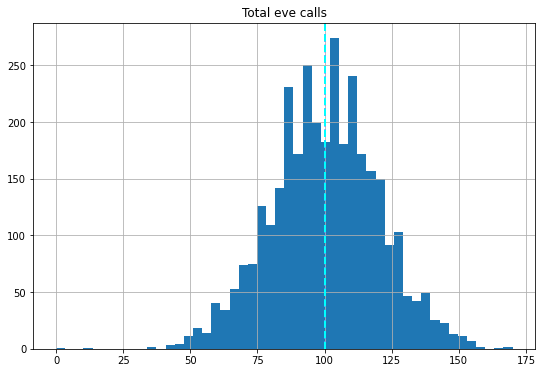

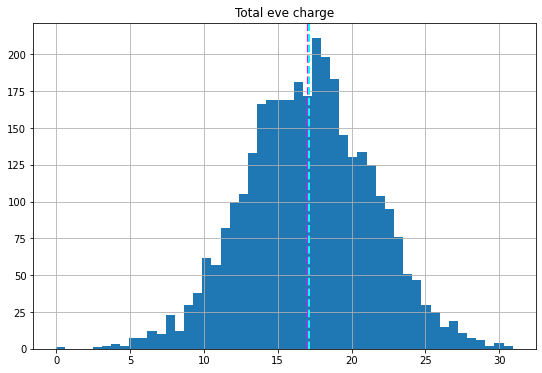

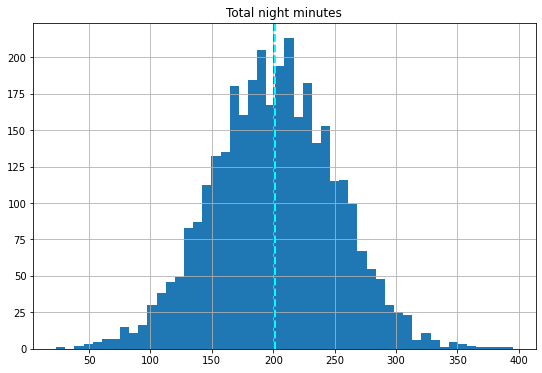

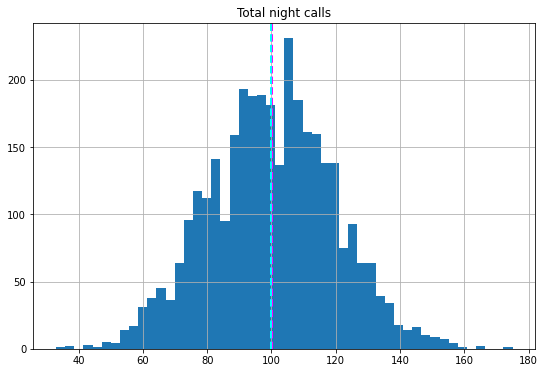

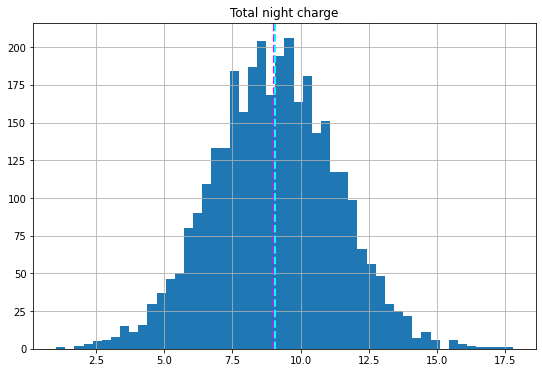

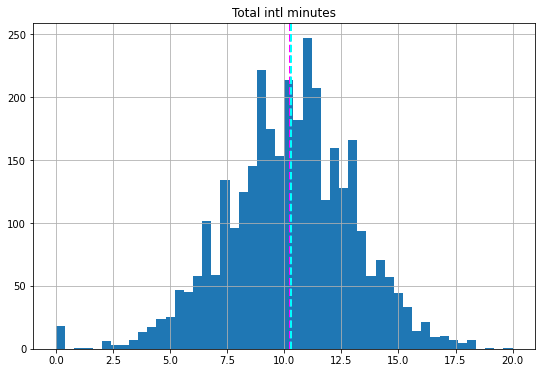

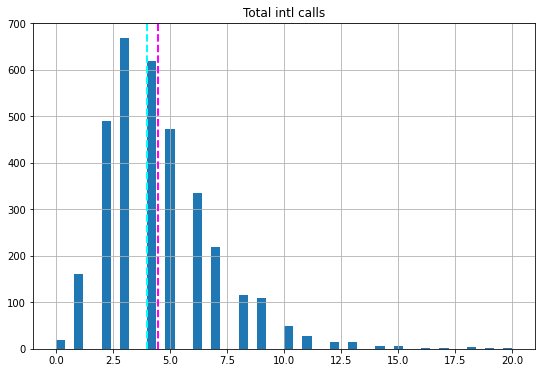

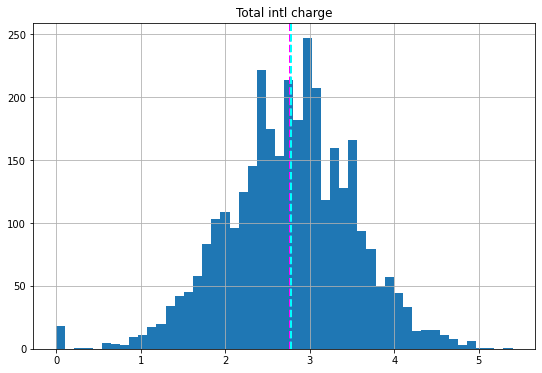

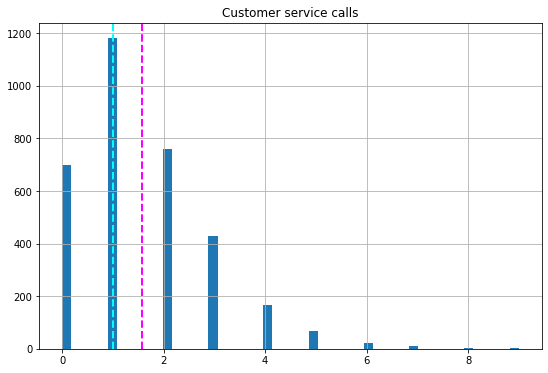

In [ ]:
for col in numeric_features:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = df[col]
    feature.hist(bins=50, ax = ax)
    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)    
    ax.set_title(col)
plt.show()

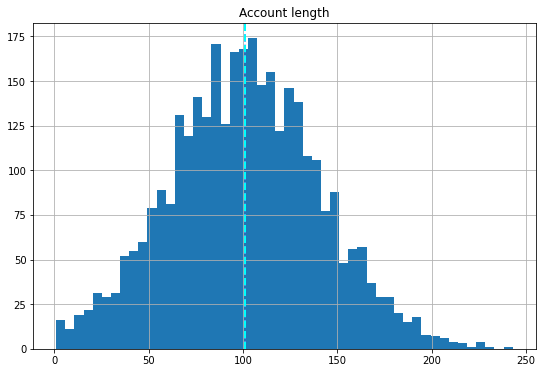

In [ ]:

    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = df["Account length"]
    feature.hist(bins=50, ax = ax)
    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)    
    ax.set_title('Account length')
plt.show()

***#We have plotted the numeric features using histogram and we can see that except customer service calls, Total intl calls ,Number vmail messages, the features are normally distributed with little to no skewness. Thus the variables are as gaussian distribution.***

In [ ]:
df['Churn'].unique()

array([False,  True])

In [ ]:
df['Churn'] = df['Churn'].apply(lambda x : 1 if    x == "True" else 0)
df['International plan'] = df['International plan'].apply(lambda x : 1 if x == "Yes" else 0)
df['Voice mail plan'] = df['Voice mail plan'].apply(lambda x : 1 if x == "Yes" else 0)

In [ ]:
df['Area code_415'] = np.where(df['Area code']== 415, 1, 0)
df['Area code_408'] = np.where(df['Area code']== 408, 1, 0)
df['Area code_510'] = np.where(df['Area code']== 510, 1, 0)
df.drop(columns=['Area code'],axis=1,inplace=True)

In [ ]:
df.head()

,State,Account length,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,...,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn,Area code_415,Area code_408,Area code_510
0,KS,128,0,1,25,265.1,110,45.07,197.4,99,...,91,11.01,10.0,3,2.70,1,0,1,0,0
1,OH,107,0,1,26,161.6,123,27.47,195.5,103,...,103,11.45,13.7,3,3.70,1,0,1,0,0
2,NJ,137,0,0,0,243.4,114,41.38,121.2,110,...,104,7.32,12.2,5,3.29,0,0,1,0,0
3,OH,84,1,0,0,299.4,71,50.90,61.9,88,...,89,8.86,6.6,7,1.78,2,0,0,1,0
4,OK,75,1,0,0,166.7,113,28.34,148.3,122,...,121,8.41,10.1,3,2.73,3,0,1,0,0


In [ ]:
df1= df.copy()

In [ ]:
df1.head()

,State,Account length,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,...,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn,Area code_415,Area code_408,Area code_510
0,KS,128,0,1,25,265.1,110,45.07,197.4,99,...,91,11.01,10.0,3,2.70,1,0,1,0,0
1,OH,107,0,1,26,161.6,123,27.47,195.5,103,...,103,11.45,13.7,3,3.70,1,0,1,0,0
2,NJ,137,0,0,0,243.4,114,41.38,121.2,110,...,104,7.32,12.2,5,3.29,0,0,1,0,0
3,OH,84,1,0,0,299.4,71,50.90,61.9,88,...,89,8.86,6.6,7,1.78,2,0,0,1,0
4,OK,75,1,0,0,166.7,113,28.34,148.3,122,...,121,8.41,10.1,3,2.73,3,0,1,0,0


In [ ]:
df1.head()

,State,Account length,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,...,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn,Area code_415,Area code_408,Area code_510
0,KS,128,0,1,25,265.1,110,45.07,197.4,99,...,91,11.01,10.0,3,2.70,1,0,1,0,0
1,OH,107,0,1,26,161.6,123,27.47,195.5,103,...,103,11.45,13.7,3,3.70,1,0,1,0,0
2,NJ,137,0,0,0,243.4,114,41.38,121.2,110,...,104,7.32,12.2,5,3.29,0,0,1,0,0
3,OH,84,1,0,0,299.4,71,50.90,61.9,88,...,89,8.86,6.6,7,1.78,2,0,0,1,0
4,OK,75,1,0,0,166.7,113,28.34,148.3,122,...,121,8.41,10.1,3,2.73,3,0,1,0,0


In [ ]:
df1

,Account length,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,...,State_WA,State_WI,State_WV,State_WY,International plan_No,International plan_Yes,Voice mail plan_No,Voice mail plan_Yes,Churn_False,Churn_True
0,128,25,265.1,110,45.07,197.4,99,16.78,244.7,91,...,0,0,0,0,1,0,0,1,1,0
1,107,26,161.6,123,27.47,195.5,103,16.62,254.4,103,...,0,0,0,0,1,0,0,1,1,0
2,137,0,243.4,114,41.38,121.2,110,10.30,162.6,104,...,0,0,0,0,1,0,1,0,1,0
3,84,0,299.4,71,50.90,61.9,88,5.26,196.9,89,...,0,0,0,0,0,1,1,0,1,0
4,75,0,166.7,113,28.34,148.3,122,12.61,186.9,121,...,0,0,0,0,0,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,192,36,156.2,77,26.55,215.5,126,18.32,279.1,83,...,0,0,0,0,1,0,0,1,1,0
3329,68,0,231.1,57,39.29,153.4,55,13.04,191.3,123,...,0,0,1,0,1,0,1,0,1,0
3330,28,0,180.8,109,30.74,288.8,58,24.55,191.9,91,...,0,0,0,0,1,0,1,0,1,0
3331,184,0,213.8,105,36.35,159.6,84,13.57,139.2,137,...,0,0,0,0,0,1,1,0,1,0


In [ ]:
df1. fillna(value=df1. mean(), inplace=True)

In [ ]:
df1.replace('?', np.nan)

,Account length,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,...,State_WA,State_WI,State_WV,State_WY,International plan_No,International plan_Yes,Voice mail plan_No,Voice mail plan_Yes,Churn_False,Churn_True
0,128,25,265.1,110,45.07,197.4,99,16.78,244.7,91,...,0,0,0,0,1,0,0,1,1,0
1,107,26,161.6,123,27.47,195.5,103,16.62,254.4,103,...,0,0,0,0,1,0,0,1,1,0
2,137,0,243.4,114,41.38,121.2,110,10.30,162.6,104,...,0,0,0,0,1,0,1,0,1,0
3,84,0,299.4,71,50.90,61.9,88,5.26,196.9,89,...,0,0,0,0,0,1,1,0,1,0
4,75,0,166.7,113,28.34,148.3,122,12.61,186.9,121,...,0,0,0,0,0,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,192,36,156.2,77,26.55,215.5,126,18.32,279.1,83,...,0,0,0,0,1,0,0,1,1,0
3329,68,0,231.1,57,39.29,153.4,55,13.04,191.3,123,...,0,0,1,0,1,0,1,0,1,0
3330,28,0,180.8,109,30.74,288.8,58,24.55,191.9,91,...,0,0,0,0,1,0,1,0,1,0
3331,184,0,213.8,105,36.35,159.6,84,13.57,139.2,137,...,0,0,0,0,0,1,1,0,1,0


In [ ]:
df1.isna().sum()

Account length            0
Number vmail messages     0
Total day minutes         0
Total day calls           0
Total day charge          0
                         ..
International plan_Yes    0
Voice mail plan_No        0
Voice mail plan_Yes       0
Churn_False               0
Churn_True                0
Length: 75, dtype: int64

In [ ]:
df2 =df[df.describe().columns]

In [ ]:
df.describe().columns

Index(['Account length', 'Number vmail messages', 'Total day minutes',
       'Total day calls', 'Total day charge', 'Total eve minutes',
       'Total eve calls', 'Total eve charge', 'Total night minutes',
       'Total night calls', 'Total night charge', 'Total intl minutes',
       'Total intl calls', 'Total intl charge', 'Customer service calls',
       'Area code_415', 'Area code_408', 'Area code_510'],
      dtype='object')

In [ ]:
df2.head()

,Account length,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Area code_415,Area code_408,Area code_510
0,128,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,1,0,0
1,107,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,1,0,0
2,137,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,1,0,0
3,84,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0,1,0
4,75,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,1,0,0


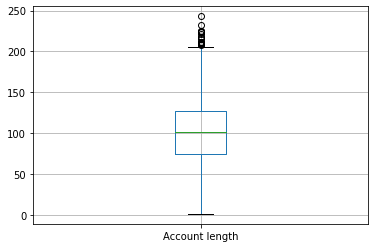

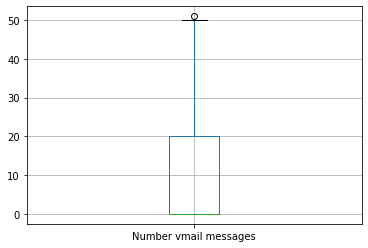

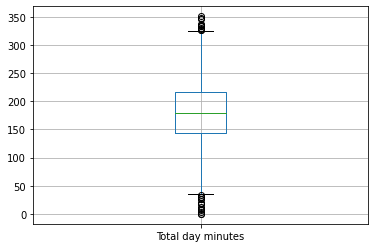

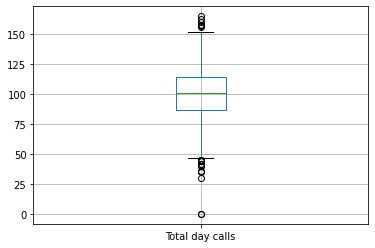

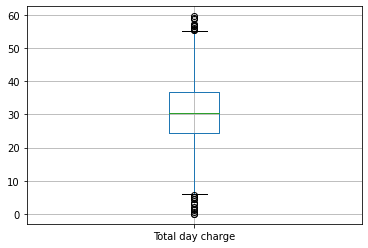

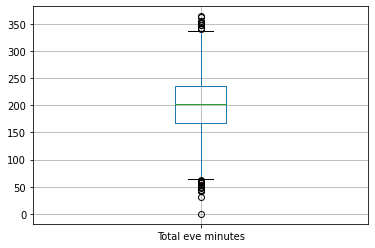

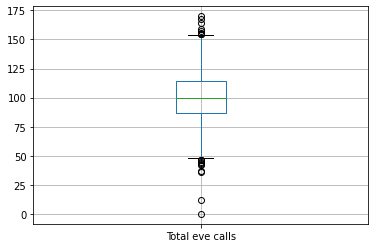

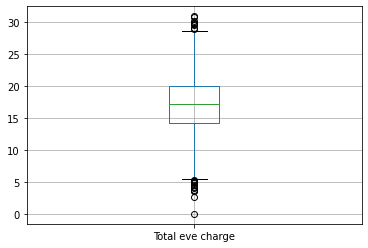

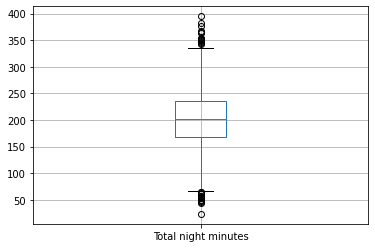

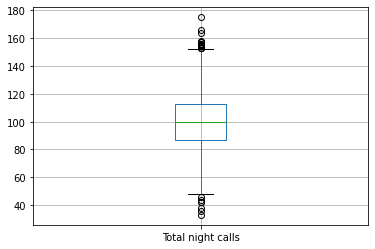

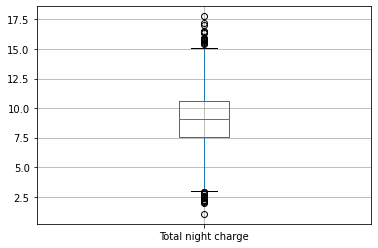

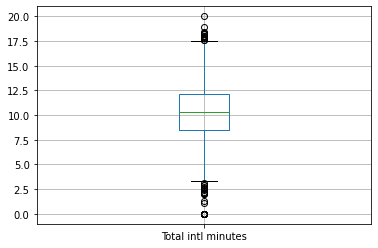

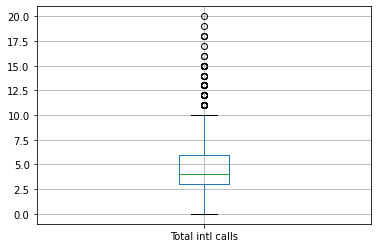

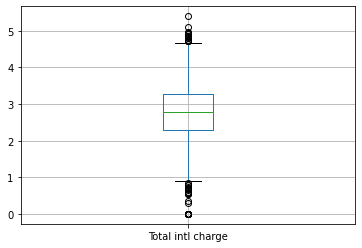

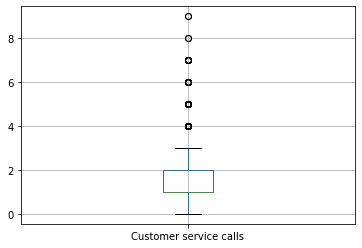

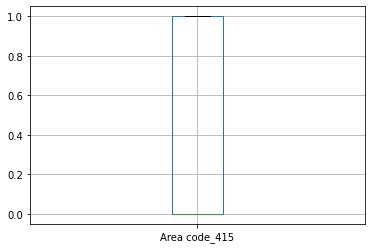

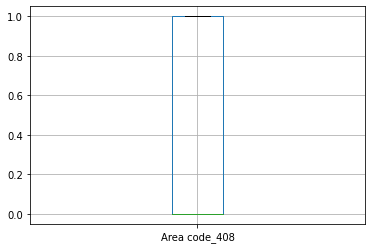

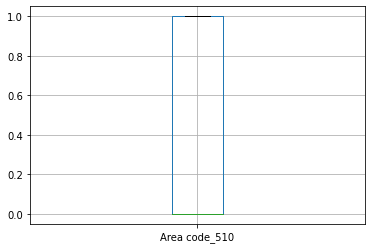

In [ ]:
for column in df2:
    plt.figure()
    df1.boxplot([column])

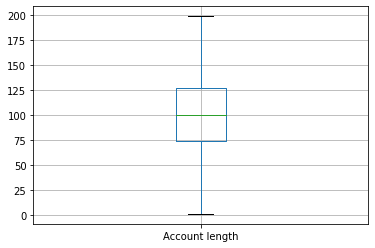

In [ ]:
df1 = df2[(df2['Account length']< 200 )]
df1.boxplot(column = (['Account length']))

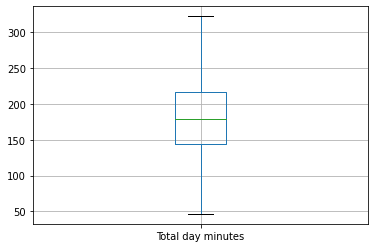

In [ ]:
df1 = df2[(df2['Total day minutes']> 45 )& (df2['Total day minutes']< 324 )]
df1.boxplot(column = (['Total day minutes']))

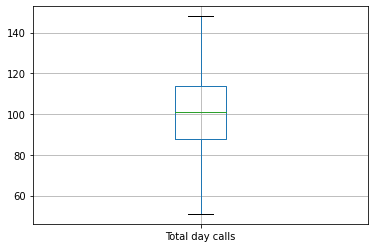

In [ ]:
df1 = df2[(df2['Total day calls']> 49  )& (df2['Total day calls']< 149 )]
df1.boxplot(column = (['Total day calls']))

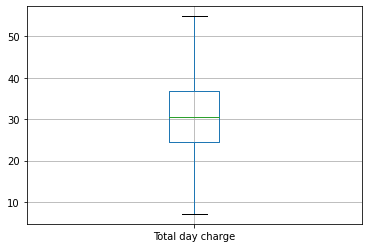

In [ ]:
df1 = df2[(df2['Total day charge']> 7  )& (df2['Total day charge']< 55 )]
df1.boxplot(column = (['Total day charge']))

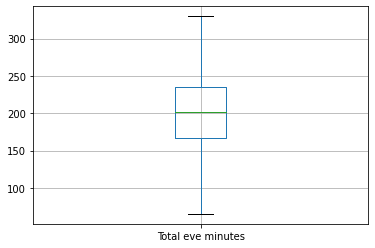

In [ ]:
df1 = df2[(df2['Total eve minutes']> 65  )& (df2['Total eve minutes']< 330 )]
df1.boxplot(column = (['Total eve minutes']))

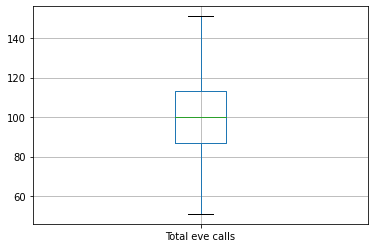

In [ ]:
df1 = df2[(df2['Total eve calls']> 50  )& (df2['Total eve calls']< 152 )]
df1.boxplot(column = (['Total eve calls']))

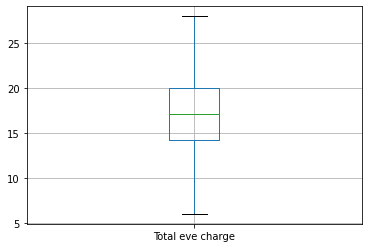

In [ ]:
df1 = df2[(df2['Total eve charge']> 6  )& (df2['Total eve charge']< 28 )]
df1.boxplot(column = (['Total eve charge']))

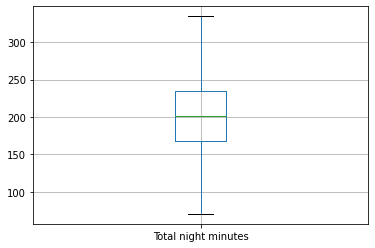

In [ ]:
df1 = df2[(df2['Total night minutes']> 69 )& (df2['Total night minutes']< 340 )]
df1.boxplot(column = (['Total night minutes']))

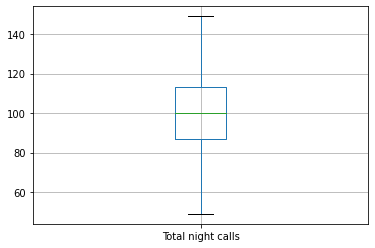

In [ ]:
df1 = df2[(df2['Total night calls']> 48 )& (df2['Total night calls']< 150 )]
df1.boxplot(column = (['Total night calls']))

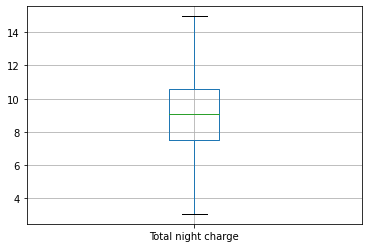

In [ ]:
df1 = df2[(df2['Total night charge']> 3 )& (df2['Total night charge']< 15.0 )]
df1.boxplot(column = (['Total night charge']))

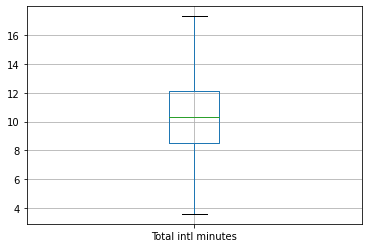

In [ ]:
df1 = df2[(df2['Total intl minutes']> 3.5 )& (df2['Total intl minutes']< 17.4 )]
df1.boxplot(column = (['Total intl minutes']))

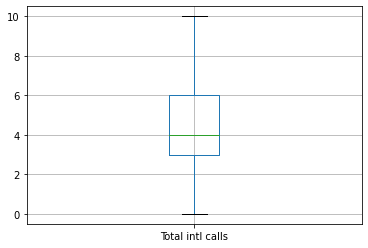

In [ ]:
df1 = df2[(df2['Total intl calls']< 10.3 )]
df1.boxplot(column = (['Total intl calls']))

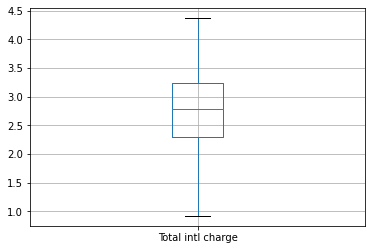

In [ ]:
df1 = df2[(df2['Total intl charge']> 0.9 )& (df2['Total intl charge']< 4.4 )]
df1.boxplot(column = (['Total intl charge']))

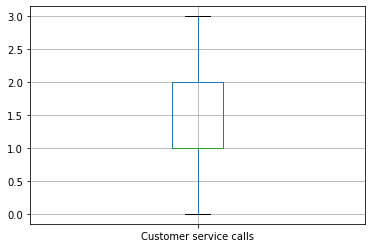

In [ ]:
df1 = df2[(df2['Customer service calls']< 3.9)]
df1.boxplot(column = (['Customer service calls']))

In [ ]:
df4 = df2[(df2['Account length']< 200 ) & (df2['Total day minutes']> 45 )& (df2['Total day minutes']< 324 ) & (df2['Total day calls']> 49  )& (df2['Total day calls']< 151 ) & (df2['Total day charge']> 7) & (df2['Total day charge']< 55) &  (df2['Total eve minutes']> 65  ) & (df2['Total eve minutes']< 330 ) & (df2['Total eve calls']> 50  )& (df2['Total eve calls']< 152 ) & (df2['Total eve charge']> 6  )& (df2['Total eve charge']< 28 ) & (df2['Total night minutes']> 69 )& (df2['Total night minutes']< 340 ) & (df2['Total day calls']> 49  ) & (df2['Total day calls']< 149 ) & (df2['Total day charge']> 7  )& (df2['Total day charge']< 55 ) & (df2['Total eve minutes']> 65  )& (df2['Total eve minutes']< 330 ) &  (df2['Total eve calls']> 50  )& (df2['Total eve calls']< 152 ) & (df2['Total eve charge']> 6  ) & (df2['Total eve charge']< 28 ) & (df2['Total night minutes']> 69 )& (df2['Total night minutes']< 340 ) & (df2['Total night calls']> 48 )& (df2['Total night calls']< 150 ) & (df2['Total night charge']> 3 )& (df2['Total night charge']< 15.0 ) & (df2['Total intl minutes']> 3.5 )& (df2['Total intl minutes']< 17.4 ) & (df2['Total intl calls']< 10.3 ) & (df2['Total intl charge']> 0.9 )& (df2['Total intl charge']< 4.4 ) & (df2['Customer service calls']< 3.9)  ]

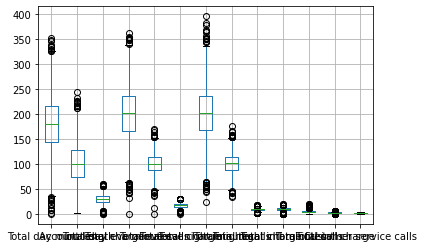

In [ ]:
df1.boxplot(column = (['Total day minutes' ,'Account length','Total day charge','Total eve minutes', 'Total eve calls', 'Total eve charge','Total night minutes', 'Total night calls', 'Total night charge','Total intl minutes', 'Total intl calls', 'Total intl charge','Customer service calls']))

In [ ]:
def find_outliers_IQR(df):

   q1=df.quantile(0.25)

   q3=df.quantile(0.75)

   IQR=q3-q1

   outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]

   return outliers

In [ ]:
outliers = find_outliers_IQR(df1['Account length'])

print('number of outliers: '+ str(len(outliers)))

print('max outlier value: '+ str(outliers.max()))

print('min outlier value: '+ str(outliers.min()))

outliers

number of outliers: 11
max outlier value: 243
min outlier value: 212


238     215
416     224
817     243
1387    212
1408    232
1551    225
1751    225
1886    224
2150    212
2277    217
3216    221
Name: Account length, dtype: int64

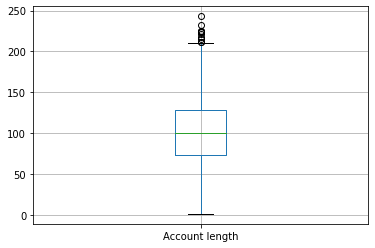

In [ ]:
df1.boxplot(column = (['Account length']))

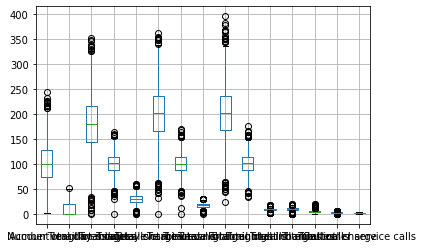

In [ ]:
df1.boxplot(column = (['Account length', 'Number vmail messages',
       'Total day minutes', 'Total day calls', 'Total day charge',
       'Total eve minutes', 'Total eve calls', 'Total eve charge',
       'Total night minutes', 'Total night calls', 'Total night charge',
       'Total intl minutes', 'Total intl calls', 'Total intl charge',
       'Customer service calls']))

In [ ]:
df1.head()

,Account length,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Area code_415,Area code_408,Area code_510
0,128,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,1,0,0
1,107,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,1,0,0
2,137,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,1,0,0
3,84,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0,1,0
4,75,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,1,0,0


In [ ]:
def outlier_treatment(datacolumn):
 sorted(datacolumn)
 Q1,Q3 = np.percentile(datacolumn , [25,75])
 IQR = Q3 - Q1
 lower_range = Q1 - (1.5 * IQR)
 upper_range = Q3 + (1.5 * IQR)
 return lower_range,upper_range

In [ ]:
numeric_features

['Account length',
 'Number vmail messages',
 'Total day minutes',
 'Total day calls',
 'Total day charge',
 'Total eve minutes',
 'Total eve calls',
 'Total eve charge',
 'Total night minutes',
 'Total night calls',
 'Total night charge',
 'Total intl minutes',
 'Total intl calls',
 'Total intl charge',
 'Customer service calls']

In [ ]:

lowerbound,upperbound = outlier_treatment(df1['Account length'])
print(lowerbound)
print(upperbound)

-9.5
210.5


In [ ]:
df1.drop(df1[ (df1['Account length'] > upperbound) | (df1['Account length'] < lowerbound) ].index , inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
lowerbound,upperbound = outlier_treatment(df1['Total day minutes'])
print(lowerbound)
print(upperbound)

34.85000000000002
325.65


In [ ]:
df1.drop(df1[ (df1['Total day minutes'] > upperbound) | (df1['Total day minutes'] < lowerbound) ].index , inplace=True)

In [ ]:
lowerbound,upperbound = outlier_treatment(df1['Total day calls'])
print(lowerbound)
print(upperbound)

46.5
154.5


In [ ]:
df1.drop(df1[ (df1['Total day calls'] > upperbound) | (df1['Total day calls'] < lowerbound) ].index , inplace=True)

In [ ]:
lowerbound,upperbound = outlier_treatment(df1['Total day charge'])
print(lowerbound)
print(upperbound)

6.200000000000003
55.08


In [ ]:
df1.drop(df1[ (df1['Total day charge'] > upperbound) | (df1['Total day charge'] < lowerbound) ].index , inplace=True)

In [ ]:
lowerbound,upperbound = outlier_treatment(df1['Total eve minutes'])
print(lowerbound)
print(upperbound)

64.00000000000001
338.4


In [ ]:
df1.drop(df1[ (df1['Total eve minutes'] > upperbound) | (df1['Total eve minutes'] < lowerbound) ].index , inplace=True)

In [ ]:
lowerbound,upperbound = outlier_treatment(df1['Total eve calls'])
print(lowerbound)
print(upperbound)

48.0
152.0


In [ ]:
df1.drop(df1[ (df1['Total eve calls'] > upperbound) | (df1['Total eve calls'] < lowerbound) ].index , inplace=True)

In [ ]:
lowerbound,upperbound = outlier_treatment(df1['Total eve charge'])
print(lowerbound)
print(upperbound)

5.525000000000002
28.685


In [ ]:
df1.drop(df1[ (df1['Total eve charge'] > upperbound) | (df1['Total eve charge'] < lowerbound) ].index , inplace=True)

In [ ]:
lowerbound,upperbound = outlier_treatment(df1['Total night minutes'])
print(lowerbound)
print(upperbound)

64.64999999999995
338.05000000000007


In [ ]:
df1.drop(df1[ (df1['Total night minutes'] > upperbound) | (df1['Total night minutes'] < lowerbound) ].index , inplace=True)

In [ ]:
lowerbound,upperbound = outlier_treatment(df1['Total night calls'])
print(lowerbound)
print(upperbound)

48.0
152.0


In [ ]:
df1.drop(df1[ (df1['Total night calls'] > upperbound) | (df1['Total night calls'] < lowerbound) ].index , inplace=True)

In [ ]:
lowerbound,upperbound = outlier_treatment(df1['Total night charge'])
print(lowerbound)
print(upperbound)

2.9587499999999993
15.16875


In [ ]:
df1.drop(df1[ (df1['Total night charge'] > upperbound) | (df1['Total night charge'] < lowerbound) ].index , inplace=True)

In [ ]:
lowerbound,upperbound = outlier_treatment(df1['Total intl minutes'])
print(lowerbound)
print(upperbound)

3.1000000000000005
17.5


In [ ]:
df1.drop(df1[ (df1['Total intl minutes'] > upperbound) | (df1['Total intl minutes'] < lowerbound) ].index , inplace=True)

In [ ]:
lowerbound,upperbound = outlier_treatment(df1['Total intl calls'])
print(lowerbound)
print(upperbound)

-1.5
10.5


In [ ]:
df1.drop(df1[ (df1['Total intl calls'] > upperbound) | (df1['Total intl calls'] < lowerbound) ].index , inplace=True)

In [ ]:
lowerbound,upperbound = outlier_treatment(df1['Total intl charge'])
print(lowerbound)
print(upperbound)

0.8949999999999996
4.695


In [ ]:
df1.drop(df1[ (df1['Total intl charge'] > upperbound) | (df1['Total intl charge'] < lowerbound) ].index , inplace=True)

In [ ]:
lowerbound,upperbound = outlier_treatment(df1['Customer service calls'])
print(lowerbound)
print(upperbound)

-0.5
3.5


In [ ]:
df1.drop(df1[ (df1['Customer service calls'] > upperbound) | (df1['Customer service calls'] < lowerbound) ].index , inplace=True)

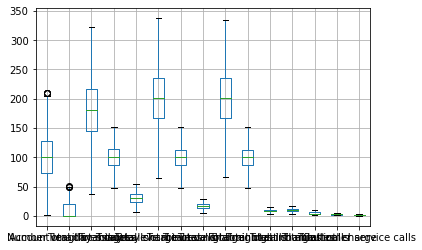

In [ ]:
df1.boxplot(column = (['Account length', 'Number vmail messages',
       'Total day minutes', 'Total day calls', 'Total day charge',
       'Total eve minutes', 'Total eve calls', 'Total eve charge',
       'Total night minutes', 'Total night calls', 'Total night charge',
       'Total intl minutes', 'Total intl calls', 'Total intl charge',
       'Customer service calls']))

In [ ]:
def find_outliers_IQR(df):

   q1=df.quantile(0.25)

   q3=df.quantile(0.75)

   IQR=q3-q1

   outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]

   return outliers

In [ ]:
for col in numeric_features:

  outliers = find_outliers_IQR(df1[col])

  print('number of outliers: '+ str(len(outliers)))

  print('max outlier value: '+ str(outliers.max()))

  print('min outlier value: '+ str(outliers.min()))

  outliers

number of outliers: 5
max outlier value: 210
min outlier value: 209
number of outliers: 3
max outlier value: 51
min outlier value: 50
number of outliers: 0
max outlier value: nan
min outlier value: nan
number of outliers: 0
max outlier value: nan
min outlier value: nan
number of outliers: 0
max outlier value: nan
min outlier value: nan
number of outliers: 0
max outlier value: nan
min outlier value: nan
number of outliers: 0
max outlier value: nan
min outlier value: nan
number of outliers: 0
max outlier value: nan
min outlier value: nan
number of outliers: 0
max outlier value: nan
min outlier value: nan
number of outliers: 0
max outlier value: nan
min outlier value: nan
number of outliers: 0
max outlier value: nan
min outlier value: nan
number of outliers: 0
max outlier value: nan
min outlier value: nan
number of outliers: 0
max outlier value: nan
min outlier value: nan
number of outliers: 0
max outlier value: nan
min outlier value: nan
number of outliers: 0
max outlier value: nan
min o

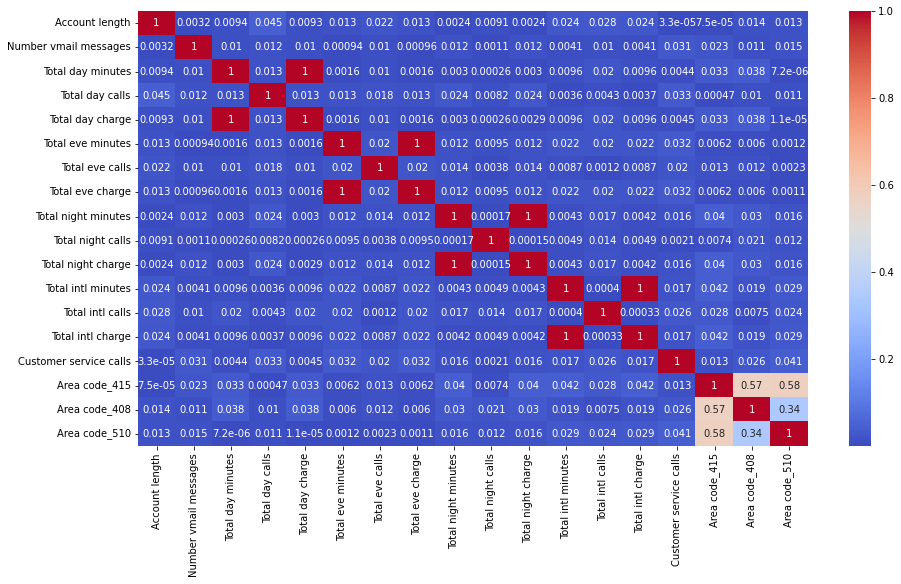

In [ ]:
## Correlation
plt.figure(figsize=(15,8))
correlation = df1.corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')

In [ ]:
df1.drop(columns=(['Total day charge', 'Total eve charge', 'Total night charge', 'Total intl charge']),axis=1,inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


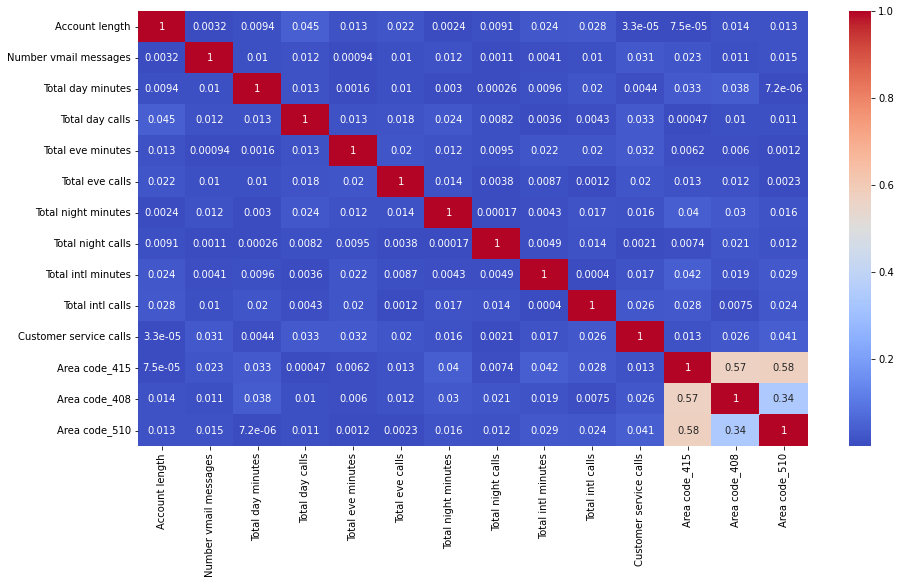

In [ ]:
plt.figure(figsize=(15,8))
correlation = df1.corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')

In [ ]:
df1.head()

,Account length,Number vmail messages,Total day minutes,Total day calls,Total eve minutes,Total eve calls,Total night minutes,Total night calls,Total intl minutes,Total intl calls,Customer service calls,Area code_415,Area code_408,Area code_510
0,128,25,265.1,110,197.4,99,244.7,91,10.0,3,1,1,0,0
1,107,26,161.6,123,195.5,103,254.4,103,13.7,3,1,1,0,0
2,137,0,243.4,114,121.2,110,162.6,104,12.2,5,0,1,0,0
4,75,0,166.7,113,148.3,122,186.9,121,10.1,3,3,1,0,0
5,118,0,223.4,98,220.6,101,203.9,118,6.3,6,0,0,0,1


In [ ]:
num = list(df1.describe().columns)
num.remove('Area code_415')
num.remove('Area code_408')
num.remove('Area code_510')
num

['Account length',
 'Number vmail messages',
 'Total day minutes',
 'Total day calls',
 'Total eve minutes',
 'Total eve calls',
 'Total night minutes',
 'Total night calls',
 'Total intl minutes',
 'Total intl calls',
 'Customer service calls']

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


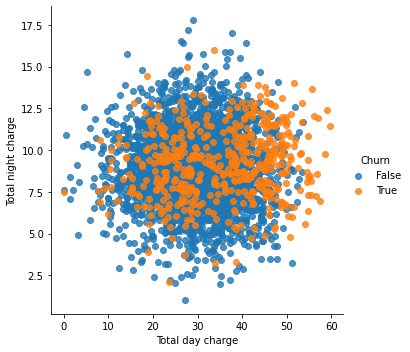

In [ ]:
sns.lmplot('Total day charge', 'Total night charge', data = df, hue='Churn', fit_reg=False);

# Here you can see, the unfaithful users(yellow hue) are scattered at the top right of the plot. This can be interpreted as that the customers who churned are the ones who use the telecom services more.

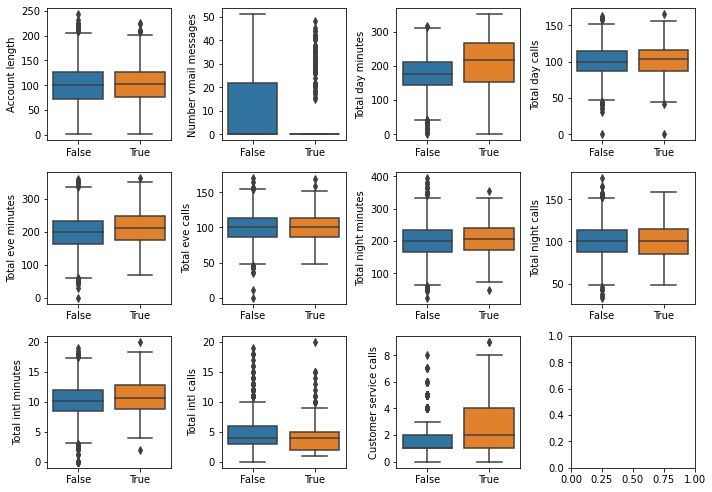

In [ ]:

fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(10,7))
for idx, feat in enumerate(num):
    ax = axes[int(idx / 4), idx % 4]
    sns.boxplot(x='Churn', y = feat, data=df, ax=ax)
    ax.set_xlabel('')
    ax.set_ylabel(feat)
fig.tight_layout();


#We have performed a multivariate analysis of churn with numeric features using box plot. The insight is that the three numeric features  namely Number of vmail messages, Total day minutes, Customer service calls are not equally distribution when it comes to churn. Though the boxplots show disparities among these featuures, it is not certain in any way it is concrete.  

In [ ]:
np.where(df['State']== 'WV')

(array([   9,   80,   87,  180,  243,  265,  390,  473,  499,  520,  574,
         594,  602,  646,  670,  681,  700,  715,  726,  767,  781,  806,
         820,  905,  931,  967, 1019, 1021, 1057, 1101, 1132, 1210, 1291,
        1362, 1429, 1430, 1444, 1499, 1503, 1538, 1566, 1567, 1603, 1644,
        1663, 1675, 1707, 1726, 1749, 1797, 1841, 1874, 1915, 2136, 2168,
        2200, 2219, 2234, 2262, 2272, 2294, 2302, 2318, 2339, 2381, 2403,
        2426, 2468, 2476, 2573, 2615, 2669, 2706, 2710, 2716, 2725, 2742,
        2799, 2811, 2831, 2832, 2833, 2846, 2859, 2877, 2910, 2955, 2966,
        2975, 3003, 3013, 3027, 3032, 3074, 3079, 3089, 3115, 3135, 3182,
        3185, 3187, 3212, 3215, 3269, 3324, 3329]),)

In [ ]:
df.loc[87]

State                        WV
Account length              111
International plan           No
Voice mail plan              No
Number vmail messages         0
Total day minutes         214.3
Total day calls             118
Total day charge          36.43
Total eve minutes         208.5
Total eve calls              76
Total eve charge          17.72
Total night minutes       182.4
Total night calls            98
Total night charge         8.21
Total intl minutes         12.0
Total intl calls              2
Total intl charge          3.24
Customer service calls        1
Churn                     False
Area code_415                 0
Area code_408                 0
Area code_510                 1
Name: 87, dtype: object

In [ ]:
df['State'].value_counts()

WV    106
MN     84
NY     83
AL     80
WI     78
OH     78
OR     78
WY     77
VA     77
CT     74
MI     73
ID     73
VT     73
TX     72
UT     72
IN     71
MD     70
KS     70
NC     68
NJ     68
MT     68
CO     66
NV     66
WA     66
RI     65
MA     65
MS     65
AZ     64
FL     63
MO     63
NM     62
ME     62
ND     62
NE     61
OK     61
DE     61
SC     60
SD     60
KY     59
IL     58
NH     56
AR     55
GA     54
DC     54
HI     53
TN     53
AK     52
LA     51
PA     45
IA     44
CA     34
Name: State, dtype: int64

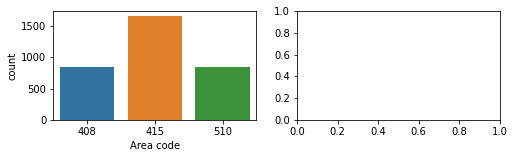

In [ ]:
_, axes = plt.subplots(nrows=1, ncols=2, figsize=(8,2))

sns.countplot(x='Area code', data = df, ax = axes[0])

# Here it is evident that the states that dwell in the Area code 415 use the telecom services to a greater extent than other codes which are quite similar in number. The reason could be 

In [ ]:
df5 = df.copy()

In [ ]:
df5=df.loc[df['Area code'] == 510, 'State']

In [ ]:
df5.value_counts()

WV    34
MN    24
UT    23
MI    22
ME    22
KS    21
WI    21
VT    20
OR    20
ID    20
FL    20
IN    20
WY    19
NJ    19
MS    19
RI    18
NV    18
GA    18
SC    17
OK    17
NY    17
DE    17
WA    17
MT    17
VA    17
SD    16
IA    16
OH    16
AL    15
ND    15
NC    15
TX    15
AR    15
IL    15
MD    15
AK    14
NE    14
DC    13
AZ    13
CT    13
NH    12
KY    12
CO    12
TN    12
MA    12
PA    12
NM    11
LA    11
MO    11
CA    10
HI     8
Name: State, dtype: int64

In [ ]:
df

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,No,Yes,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,No,No,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,No,No,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,Yes,No,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False


In [ ]:
df['International plan'].value_counts()

No     3010
Yes     323
Name: International plan, dtype: int64

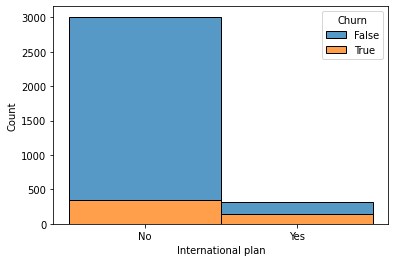

In [ ]:

sns.histplot(binwidth=0.5, x="International plan", hue="Churn", data=df, stat="count", multiple="stack")

***From this histogram, it is evident that people with international plan don't really sway towards churning. On the other hand, people who haven't subscribed to the international plan are more faithful as they have not churned maybe due to underlying reasons like the subscription is expensive and the users are locally based who don't communicate abroad. ***

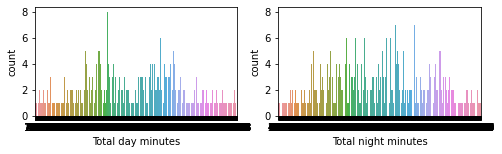

In [ ]:
_, axes = plt.subplots(nrows=1, ncols=2, figsize=(8,2))

sns.countplot(x='Total day minutes', data = df, ax = axes[0])
sns.countplot(x='Total night minutes', data = df, ax = axes[1]);

In [ ]:
minutes_at_day =  df['Total day minutes'].sum()

In [ ]:
minutes_at_night =df['Total night minutes'].sum()

In [ ]:
names = ['minutes_at_day','minutes_at_night']
values = [minutes_at_day,minutes_at_night]

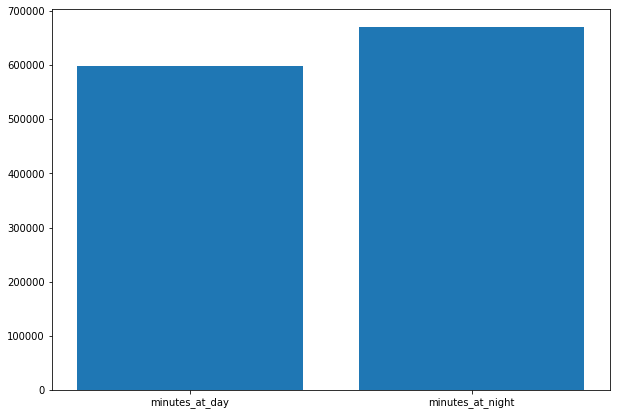

In [ ]:
# Figure Size
fig = plt.figure(figsize =(10, 7))
values = [minutes_at_day,minutes_at_night]
names = ['minutes_at_day','minutes_at_night']
# Horizontal Bar Plot
plt.bar(names, values)
 
# Show Plot
plt.show()

In [ ]:
df.groupby(['State', 'Churn'],as_index=False).agg({'Churn':'max'})

,State,Churn
0,AK,False
1,AK,True
2,AL,False
3,AL,True
4,AR,False
...,...,...
97,WI,True
98,WV,False
99,WV,True
100,WY,False


In [ ]:
df

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,No,Yes,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,No,No,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,No,No,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,Yes,No,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False


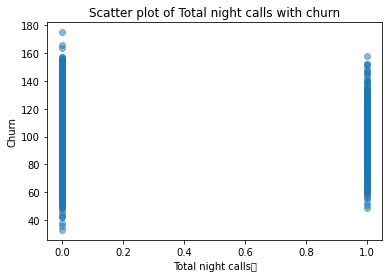

In [20]:
plt.scatter(df['Churn'], df['Total night calls'], alpha=0.5)
plt.title('Scatter plot of Total night calls with churn')
plt.xlabel('Total night calls	')
plt.ylabel('Churn')
plt.show()

In [ ]:
df_night_mins = df.groupby

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f894afa5820>],
      dtype=object)

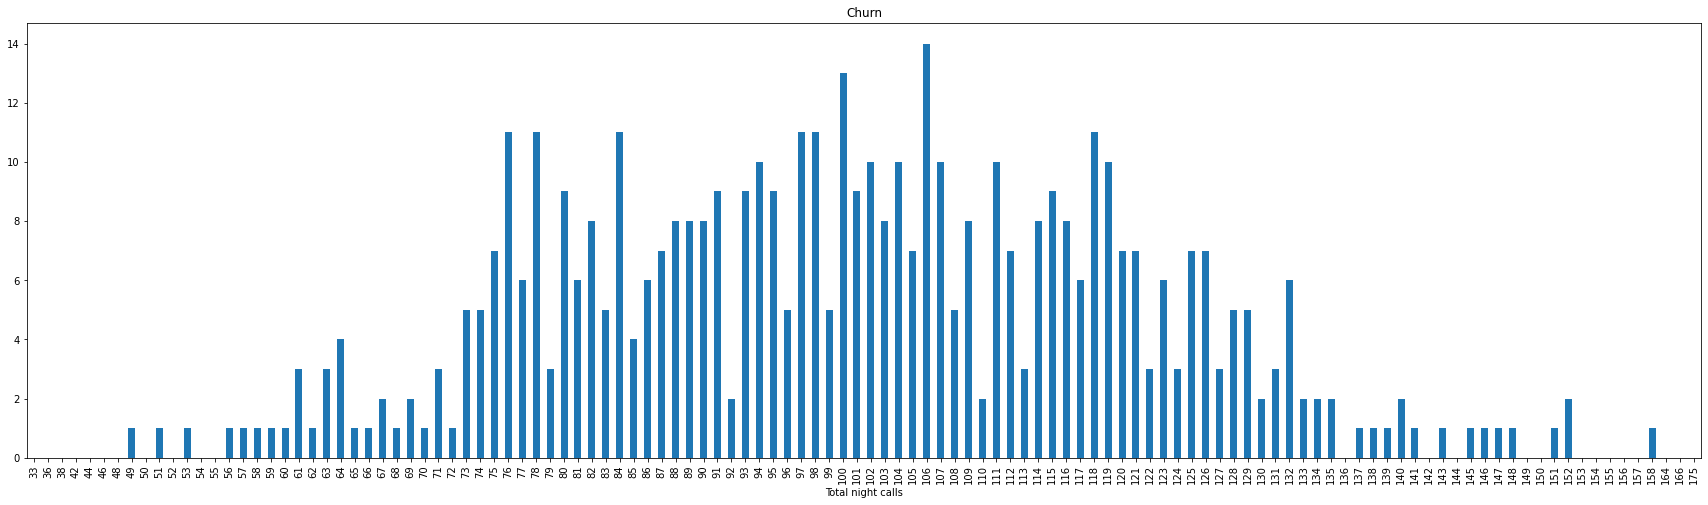

In [14]:
df_totalnight.plot(kind='bar', subplots=True, figsize=(30, 8))

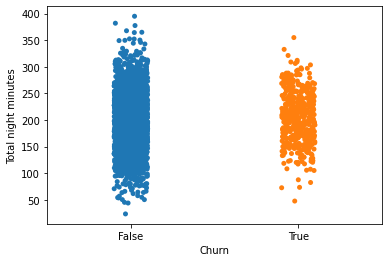

In [54]:
sns.stripplot( x = 'Churn', y = 'Total night minutes', data = df)

***This is a plot between total night calls and churn. The people who spend more time during night in calls prefer not to churn.***

In [29]:
df_tenure = df.groupby('Account length').sum()['Churn']

In [26]:
df['Account length'].nunique()

212

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f894af25070>],
      dtype=object)

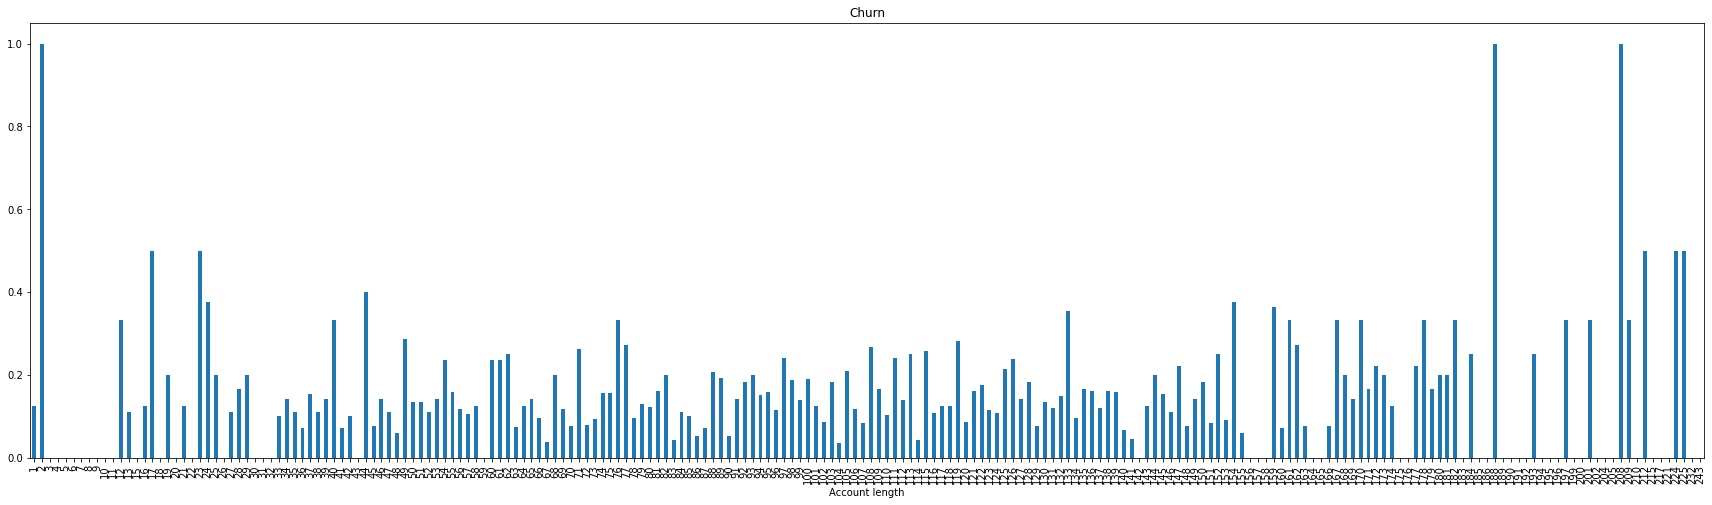

In [28]:
df_tenure.plot(kind='bar', subplots=True, figsize=(30, 8))

/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


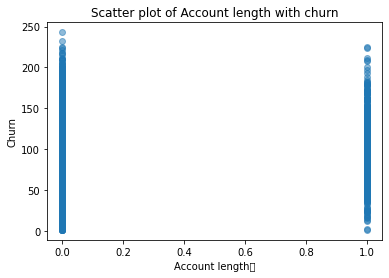

In [30]:
plt.scatter(df['Churn'], df['Account length'], alpha=0.5)
plt.title('Scatter plot of Account length with churn')
plt.xlabel('Account length	')
plt.ylabel('Churn')
plt.show()

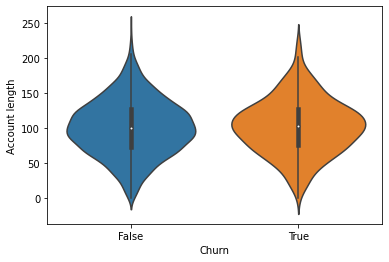

In [42]:
sns.violinplot( x = 'Churn', y = 'Account length', data = df)

***This violin plot suggest that there is no concrete correlation between account length and churn possibility.***

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [56]:
df_state = df.groupby('State').sum()['Churn']

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f893fa9e3d0>],
      dtype=object)

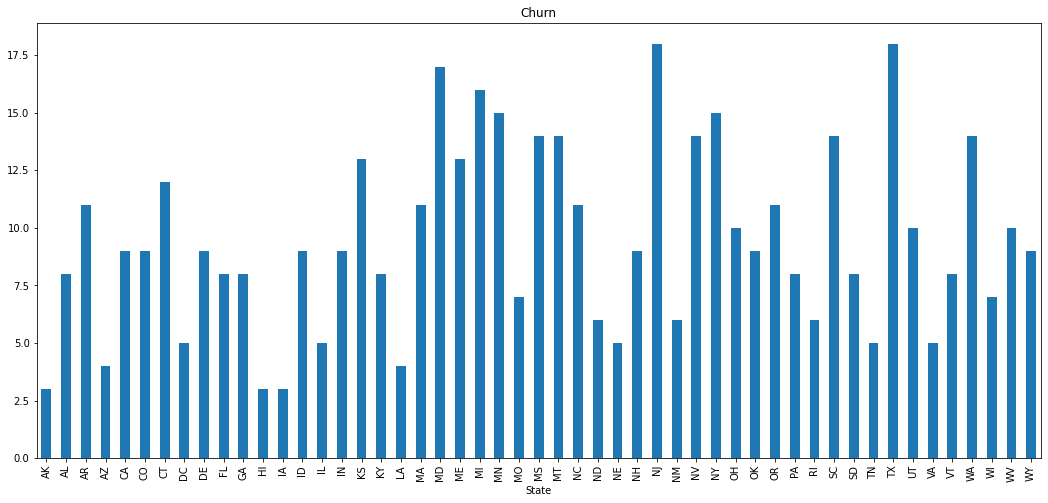

In [61]:
df_state.plot(kind='bar', subplots=True, figsize=(18, 8))

In [ ]:
East_coast = ['AL', 'CT', 'DC', 'DE','FL','GA','IN','KY', 'MA','MD', 'ME','NC', 'NH', 'NJ', 'NY', 'OH', 'RI', 'SC', 'VA', 'VT','WV']
West_coast = ['AK','AZ','CA','CO','HI','ID','MT', 'NM','OK','OR', 'PA','SD', 'UT','WA', 'WY' ]
Central = ['AR','IA','IL','KS','LA','MI', 'MN', 'MO','MS', 'ND', 'NE', 'NV','TN', 'TX', 'WI']

In [90]:
df['Region of Customers'] = df['State'].apply(lambda x:'East Coast' if x in East_coast else 'West_coast' if x in  West_coast else 'Central')

In [111]:
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,...,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn,Region of Customers,Monthly Charge
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,...,244.7,91,11.01,10.0,3,2.70,1,False,Central,75.56
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,...,254.4,103,11.45,13.7,3,3.70,1,False,East Coast,59.24
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,...,162.6,104,7.32,12.2,5,3.29,0,False,East Coast,62.29
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,...,196.9,89,8.86,6.6,7,1.78,2,False,East Coast,66.80
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,...,186.9,121,8.41,10.1,3,2.73,3,False,West_coast,52.09


In [112]:
df.columns

Index(['State', 'Account length', 'Area code', 'International plan',
       'Voice mail plan', 'Number vmail messages', 'Total day minutes',
       'Total day calls', 'Total day charge', 'Total eve minutes',
       'Total eve calls', 'Total eve charge', 'Total night minutes',
       'Total night calls', 'Total night charge', 'Total intl minutes',
       'Total intl calls', 'Total intl charge', 'Customer service calls',
       'Churn', 'Region of Customers', 'Monthly Charge'],
      dtype='object')

In [105]:
df['Monthly Charge'] = df['Total day charge'] + df['Total eve charge'] + df['Total night charge'] + df['Total intl charge']

In [ ]:
df

In [114]:
df_month_charge = df.groupby('Monthly Charge').mean()['Churn']

In [117]:
df_month_charge.value_counts()

0.000000    2213
1.000000     373
0.500000      74
0.333333      14
0.666667       3
0.250000       1
Name: Churn, dtype: int64

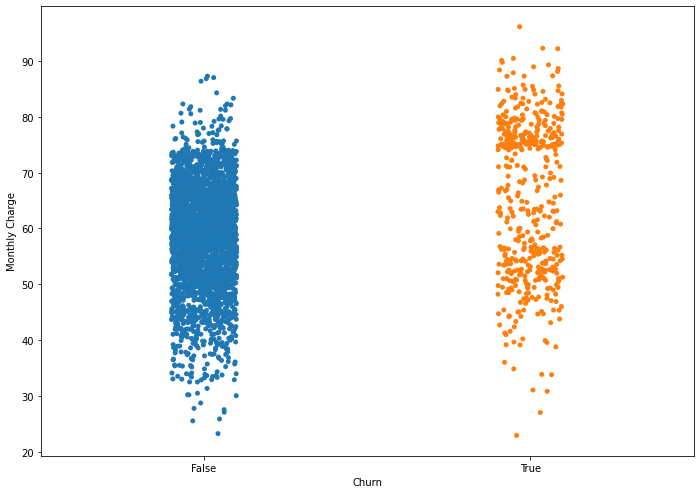

In [118]:
sns.stripplot( x = 'Churn', y = 'Monthly Charge', data = df)

***The customers who are spending more money for the services are churning maybe because they are not satisfied with the prices.***

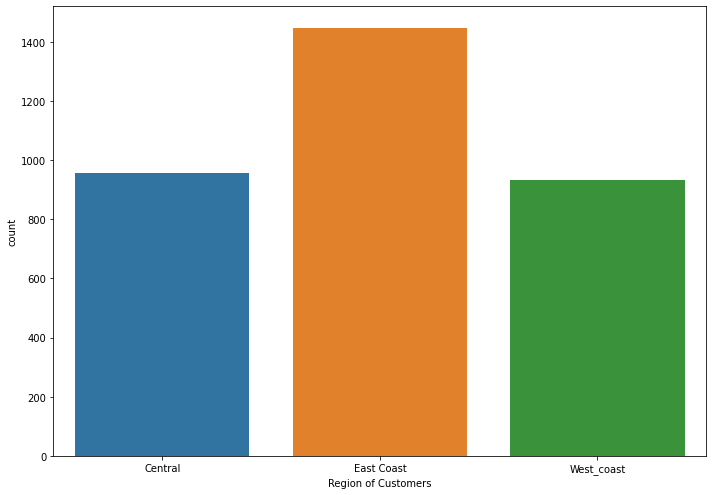

In [96]:
from matplotlib import rcParams

# figure size in inches
rcParams['figure.figsize'] = 11.7,8.27
sns.countplot(x='Region of Customers', data = df  )

***There are more customers in East Coast Region so we can assume that more people will churn from this region.***

In [97]:
df_reg = df.groupby('Region of Customers').sum()['Churn']

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f893f4bd130>],
      dtype=object)

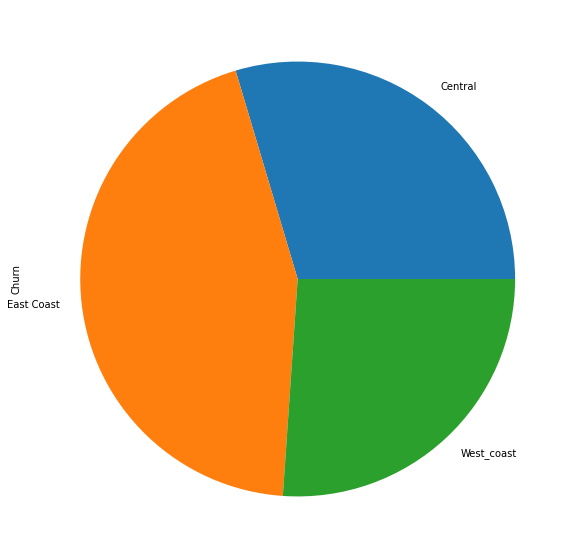

In [98]:
df_reg .plot(kind='pie', subplots=True, figsize=(10, 10))

***There are more customers who are churning in East Coast Region. One reason might be that the rival companies might be offering better services for lower prices***.